In [1]:
from tensorflow.keras.datasets import mnist
import tensorflow as tf
from tensorflow.keras import layers
from numpy import genfromtxt

import io
import csv
import pandas as pd
import numpy as np
np.set_printoptions(threshold=50)
import sklearn

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics,preprocessing

from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Masking
from tensorflow.keras.utils import plot_model
from numpy import array
from numpy import argmax
import random



In [2]:
#在CPU train,可以加入長資料
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"


In [3]:
def tocate(num):
    o=[]
    df=pd.read_excel('poi-TKY.xlsx')
    for i in range(len(num)):
        for j in range(len(df)):
            if num[i]==df.poiID[j]:
                o.append(df.cate[j])
                break
    return o

In [4]:
def tocoor(num):
    naki=genfromtxt('coorlabeltest3681poi.csv', delimiter=',')
    o = [int(item) for item in naki]
    oo=[]
    for i in range(len(num)):
        oo.append(o[num[i]])
    return oo

In [31]:
def checklist(real,generate):
    Y=0
    for i in range(len(real)):
        if real[i]==generate[i]:
            Y+=1
    return Y/(len(real))

In [5]:
timestep = 38
tracount = 1680

In [6]:
def  read_sequence_and_firstpoi(filename,timestep,tracount):
    df=pd.read_excel(filename)#檔案名稱
    df=df.fillna(0)
    df2=[]
    df3=[]
    pad=[]
    for i in range(len(df)):
        df3=[]
        j=0
        while df.iat[i,j]!=0:
#             print(df.iat[i,j],j)
            df3.append(df.iat[i,j])
            j+=1
            if j==timestep:
                break
        pad.append(j)
        df2.append(df3)
    df2
    padded_inputs = tf.keras.preprocessing.sequence.pad_sequences(
        df2, padding="post",value=0,maxlen=38
    )

    print(padded_inputs.shape)

    padded_inputsf=[]
    for i in range(len(padded_inputs)):
        padded_inputsf.append(padded_inputs[i][0])
    padded_inputsf = np.asarray(padded_inputsf)
    padded_inputsf = padded_inputsf.reshape(tracount,1)
    
    padded_inputse=[]
    for i in range(len(padded_inputs)):
        k=0
        while padded_inputs[i][k]!=0:
            k+=1
            if k==38:
                break
        padded_inputse.append(padded_inputs[i][k-1])
    padded_inputse = np.asarray(padded_inputse)
    padded_inputse = padded_inputse.reshape(tracount,1)
    return padded_inputs,padded_inputsf,padded_inputse

In [7]:
padori,padfori,padeori = read_sequence_and_firstpoi("test1680/output_data.xlsx",38,1680)
padclus0,padfclus0,padeclus0 = read_sequence_and_firstpoi("clus0tripbalance.xlsx",38,18000)
padclus1,padfclus1,padeclus1 = read_sequence_and_firstpoi("clus1tripbalance.xlsx",38,18000)
padclus2,padfclus2,padeclus2 = read_sequence_and_firstpoi("clus2tripbalance.xlsx",38,18000)

(1680, 38)
(18000, 38)
(18000, 38)
(18000, 38)


In [8]:
def  read_coorlabel(filename,timestep,tracount):
    my_data = genfromtxt(filename, delimiter=',')
    df5 = my_data.reshape(tracount,timestep,2)
    df2c=[]
    df3c=[]
    df4c=[]
    for i in range(tracount):
        df4c=[]
        for j in range(timestep):
            df3c=[]
            df3c.append(df5[i][j][1])
            df4c.append(df3c)
        df2c.append(df4c)
    df2c = np.array(df2c)
#     print(df2c.shape)
    
    df2cf=[]
    for i in range(tracount):
        df4cf=[]
        df3cf=[]
        df3cf.append(df5[i][0][1])
        df4cf.append(df3cf)
        df2cf.append(df4cf)
    df2cf = np.array(df2cf)
    return df2c,df2cf

In [9]:
coorlabelori,coorlabelorif = read_coorlabel('coorlabelori.csv',38,1680)
coorlabelclus0,coorlabelclus0f = read_coorlabel('clus0coorlabel.csv',38,18000)
coorlabelclus1,coorlabelclus1f = read_coorlabel('clus1coorlabel.csv',38,18000)
coorlabelclus2,coorlabelclus2f = read_coorlabel('clus2coorlabel.csv',38,18000)

In [10]:
coorlabel= np.concatenate((coorlabelclus0,coorlabelclus1,coorlabelclus2), axis=0)



# 把類別(數字)處理成onehot

In [11]:
def  read_cate(filename,timestep,tracount):
    my_data = genfromtxt(filename, delimiter=',')
    df5 = my_data.reshape(tracount,timestep,2)
    df2c=[]
    df3c=[]
    df4c=[]
    for i in range(tracount):
        df4c=[]
        for j in range(timestep):
            df3c=[]
            df3c.append(df5[i][j][1])
            df4c.append(df3c)
        df2c.append(df4c)
    df2c = np.array(df2c)
#     print(df2c.shape)
    
    df2cf=[]
    for i in range(tracount):
        df4cf=[]
        df3cf=[]
        df3cf.append(df5[i][0][1])
        df4cf.append(df3cf)
        df2cf.append(df4cf)
    df2cf = np.array(df2cf)
    return df2c,df2cf

In [12]:
cateori,catefori = read_cate('test1680/output_datacat.csv',38,1680)
cateclus0,cateclus0f = read_cate('clus0cate.csv',38,18000)
cateclus1,cateclus1f = read_cate('clus1cate.csv',38,18000)
cateclus2,cateclus2f = read_cate('clus2cate.csv',38,18000)

In [13]:
cate= np.concatenate((cateclus0,cateclus1,cateclus2), axis=0)
# cate.shape
catef = np.concatenate((cateclus0f,cateclus1f,cateclus2f), axis=0)

In [14]:

pad = np.concatenate((padclus0,padclus1,padclus2), axis=0)
pad.shape
padf = np.concatenate((padfclus0,padfclus1,padfclus2), axis=0)
padf.shape
pade = np.concatenate((padeclus0,padeclus1,padeclus2), axis=0)
pade.shape

(54000, 1)

In [15]:
lenth=[]
for i in range(len(pad)):
    for j in range(len(pad[i])+1):
        if j==38:
            break
        if pad[i][j]==0:
            break
    lenth.append(j)
lenth=np.array(lenth)

with open('1680lenth.csv', 'w', newline='') as csvfile:
  writer = csv.writer(csvfile)
  writer.writerows(map(lambda x: [x], lenth))

In [16]:
padf = np.concatenate((padfclus0,padfclus1,padfclus2), axis=0)
padf

array([[ 117],
       [1551],
       [ 241],
       ...,
       [ 443],
       [3433],
       [  12]])

In [17]:
a=np.zeros((18000,1))
b=np.zeros((18000,1))
c=np.zeros((18000,1))
b=b+1
c=c+2
c
clus = np.concatenate((a,b,c), axis=0)
clus=np.array(clus)
clus=clus.reshape(54000)

In [18]:
with open('54000clus.csv', 'w', newline='') as csvfile:
  writer = csv.writer(csvfile)
  writer.writerows(map(lambda x: [x], clus))

In [19]:
# from keras.utils import to_categorical
y_binary = to_categorical(pad,3681)
y_binary.shape


first_binary = to_categorical(padf,3681)
first_binary=first_binary.reshape(54000,1,3681)
first_binary.shape



cate_binary = to_categorical(cate,15)
cate_binary.shape

cate_binaryf = to_categorical(catef,15)
cate_binaryf.shape

coorlabel_binary = to_categorical(coorlabel,400)
coorlabel_binary.shape



# clus_binary = to_categorical(clus)
# clus_binary.shape

# clusf=[]
# for i in range(len(clus)):
#     clusf.append(clus[i][0])
# clusf = np.asarray(clusf)
# clusf = clusf.reshape(60000,1)

# clus_binaryf=[]
# for i in range(len(clus_binary)):
#     clus_binaryf.append(clus_binary[i][0])
# clus_binaryf = np.asarray(clus_binaryf)
# clus_binaryf = clus_binaryf.reshape(60000,1,3)
# clus_binaryf.shape

(54000, 38, 400)

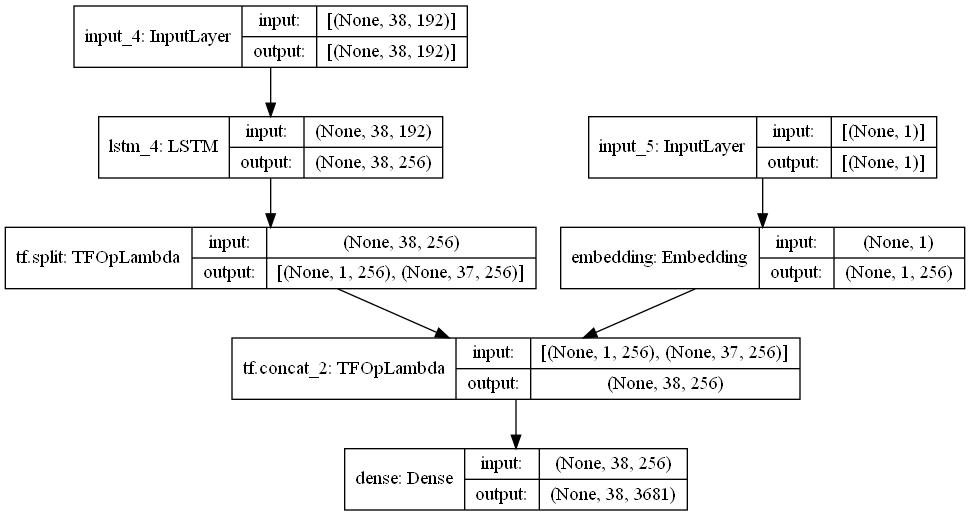

In [20]:
num_encoder_tokens = 3681
num_decoder_tokens = 3681
n_units = 512
steps = 38


# define training encoder
# encoder_inputs0 = Input(shape=(1))
# encoder_inputs00 = Input(shape=(1))
encoder_inputs1 = Input(shape=(steps, 15))
encoder_inputs2 = Input(shape=(steps, 400))
# encoder_inputs3 = Input(shape=(steps, 3))
encoder_inputs4 = Input(shape=(steps,3681))


# ll = layers.RepeatVector(38)(encoder_inputs4)

# encoder1 = LSTM(n_units,return_sequences=True)#, return_state=True,return_sequences=True
# embedding0 = layers.Embedding(3681,38*8,input_length=1)
# embedding00 = layers.Embedding(3681,38*8,input_length=1)
# encoder2 = LSTM(256,return_sequences=True)
encoder3 = LSTM(128,return_sequences=True)
encoder4 = LSTM(64,return_sequences=True)

encoderforcate = LSTM(64,return_sequences=True)
# encoderforcoor1 = LSTM(128,return_sequences=True)
encoderforcoor2 = LSTM(64,return_sequences=True)
# encoderfordis = LSTM(5,return_sequences=True)
# encoderfortlen = LSTM(1,return_sequences=True)

# tlen = encoderfortlen(encoder_inputs4)
# x = tf.concat([encoder_inputs3, tlen], 2)
# x = encoder1(encoder_inputs3)
# x = encoder2(encoder_inputs3)
# x = embedding(encoder_inputs3)
x = encoder3(encoder_inputs4)
x = encoder4(x)
# first = embedding0(encoder_inputs0)
# first = layers.Reshape((38, 8))(first)
# end = embedding00(encoder_inputs00)
# end = layers.Reshape((38, 8))(end)

cate = encoderforcate(encoder_inputs1)

# coor = encoderforcoor1(encoder_inputs2)
coor = encoderforcoor2(encoder_inputs2)
# dis = encoderfordis(encoder_inputs2)


encoded = tf.concat([x, cate], 2)
# encoded = tf.concat([first, cate], 2)
encoded = tf.concat([encoded, coor], 2)
# encoded = tf.concat([encoded, end], 2)
# encoded = tf.concat([encoded, dis], 2)
# encoded = LSTM(128,return_sequences=True)(encoded)
# encoded = LSTM(64)(encoded)
# encoded = tf.concat([encoded, encoder_inputs3], 2)
# encoded = tf.concat([encoded, encoder_inputs5], 2)
encoder = Model([encoder_inputs1,encoder_inputs2,encoder_inputs4], encoded)
# encoder_states2 = [state_h, state_c]

#--------------------Decoder---------------------------
# define training decoder
# TimeDistributed1 = layers.TimeDistributed(Dense(16))(encoder_outputs)
decoder_inputs = Input(shape=(38,192))
decoder_inputs1 = Input(shape=(1))
# decoder_inputs2 = Input(shape=(1))
# decoder_inputs3 = Input(shape=(1,3))
# decoder_inputs4 = Input(shape=(1,3681))


# x2 = layers.RepeatVector(12)(decoder_inputs1)
# x2 = Dense(16)(x2)
# x = layers.TimeDistributed(Dense(16))(decoder_inputs1)

# x = tf.keras.layers.RepeatVector(38)(decoder_inputs)
# x = LSTM(76,return_sequences=True)(decoder_inputs)
x = LSTM(256,return_sequences=True)(decoder_inputs)
# x1,x2 = tf.split(x,[1,steps-1],1)
# decoder0 = LSTM(512,return_sequences=True)
# decoder1 = LSTM(256,return_sequences=True)
# decoder2 = LSTM(32,return_sequences=True)
embedding0 = layers.Embedding(3681,256,input_length=1)
# embedding00 = layers.Embedding(3681,256,input_length=1)
first = embedding0(decoder_inputs1)
# end = embedding00(decoder_inputs2)
# decoderforcate = LSTM(7,return_sequences=True)
# decoderfordis = LSTM(5,return_sequences=True)
# decoderfortlen = LSTM(1,return_sequences=True)

# x6 = decoderfortlen(decoder_inputs4)
# x7 = tf.concat([decoder_inputs3, x6], 2)

# decoder00 = LSTM(256,return_sequences=True)
# decoder11 = LSTM(512,return_sequences=True)



# x3 = decoder0(decoder_inputs3)
# x3 = decoder1(decoder_inputs3)
# x3 = embedding2(decoder_inputs3)
# x3 = decoder2(decoder_inputs4)
# x4 = decoderfordis(decoder_inputs2)
# x5 = decoderforcate(decoder_inputs1)
# x3 = tf.concat([x3, x5], 2)
# x3 = tf.concat([x3, x4], 2)
# x3 = tf.concat([x3, decoder_inputs3], 2)
# x3 = tf.concat([x3, decoder_inputs5], 2)
# In = tf.concat([x3, x2], 1)

# x = decoder00(In)
# x = decoder11(x)
# decoded = decoder3(decoder_inputs1)

# decoder_dense = Dense(num_decoder_tokens, activation='softmax')
# decoder_outputs2 = decoder_dense(x)

r0,xx = tf.split(x,[1,37],1)
# x10 = Dense(39, activation='softmax')(x9)

xx = tf.concat([first, xx], 1)
decoded = Dense(3681, activation='softmax')(xx)
decoder = Model([decoder_inputs,decoder_inputs1], decoded)

# plot_model(encoder, to_file='encoder_model.png', show_shapes=True)
plot_model(decoder, to_file='decoder_model.png', show_shapes=True)

In [21]:
encoder.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 38, 3681)]   0                                            
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 38, 128)      1950720     input_3[0][0]                    
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 38, 15)]     0                                            
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 38, 64)       49408       lstm[0][0]                       
______________________________________________________________________________________________

In [22]:
# encoder_input0 = Input(shape=(1))
# encoder_input00 = Input(shape=(1))

encoder_input1 = Input(shape=(38,15))
encoder_input2 = Input(shape=(38,400))
# encoder_input3 = Input(shape=(38))
encoder_input4 = Input(shape=(38,3681))
# encoder_input4 = Input(shape=(38,2))

decoder_input1 = Input(shape=(1))
# decoder_input2 = Input(shape=(1))
# # decoder_input3 = Input(shape=(1))
# decoder_input4  = Input(shape=(1,3681))
# decoder_input4  = Input(shape=(1,2))

encoded = encoder([encoder_input1,encoder_input2,encoder_input4])
decoded = decoder([encoded,decoder_inputs1])

autoencoder = Model([encoder_input1,encoder_input2,encoder_input4,decoder_inputs1]
                     ,decoded)
autoencoder.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 38, 15)]     0                                            
__________________________________________________________________________________________________
input_7 (InputLayer)            [(None, 38, 400)]    0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, 38, 3681)]   0                                            
__________________________________________________________________________________________________
model (Functional)              (None, 38, 192)      2139648     input_6[0][0]                    
                                                                 input_7[0][0]              

In [23]:
autoencoder.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# train model
S=0
F=54000
history = autoencoder.fit(x=[cate_binary[S:F],coorlabel_binary[S:F],y_binary[S:F],padf[S:F]]
                             ,y=y_binary[S:F] ,epochs=20, batch_size=128,validation_split=0.2)

Epoch 1/20
338/338 [==============================] - 180s 514ms/step - loss: 3.9739 - accuracy: 0.5204 - val_loss: 5.5810 - val_accuracy: 0.2861
Epoch 2/20
338/338 [==============================] - 169s 500ms/step - loss: 3.3045 - accuracy: 0.5306 - val_loss: 4.8877 - val_accuracy: 0.2987
Epoch 3/20
338/338 [==============================] - 169s 501ms/step - loss: 2.5284 - accuracy: 0.5681 - val_loss: 3.5039 - val_accuracy: 0.3990
Epoch 4/20
338/338 [==============================] - 170s 502ms/step - loss: 1.4550 - accuracy: 0.7341 - val_loss: 2.0183 - val_accuracy: 0.6442
Epoch 5/20
338/338 [==============================] - 169s 500ms/step - loss: 0.6240 - accuracy: 0.8999 - val_loss: 0.9916 - val_accuracy: 0.8354
Epoch 6/20
338/338 [==============================] - 168s 497ms/step - loss: 0.2661 - accuracy: 0.9671 - val_loss: 0.5072 - val_accuracy: 0.9272
Epoch 7/20
338/338 [==============================] - 170s 502ms/step - loss: 0.1334 - accuracy: 0.9873 - val_loss: 0.2782 -

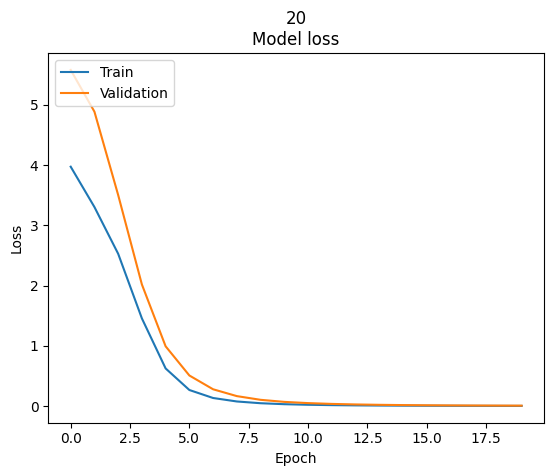

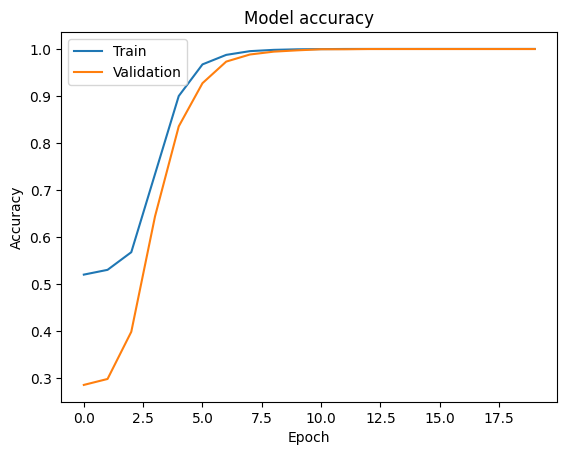

In [24]:
import matplotlib.pyplot as plt


 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('20'+'\n'+'Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()

In [24]:
y_binaryori = to_categorical(padori,3681)
y_binaryori.shape

cate_binaryori = to_categorical(cateori,15)
cate_binaryori.shape

coorlabel_binaryori = to_categorical(coorlabelori,400)
coorlabel_binaryori.shape

(1680, 38, 400)

In [25]:
fakeinput=[]
for i in range(2):
    temp=[]
    for j in range(5):
        temp.append(random.randint(0, 3681))
    fakeinput.append(temp)
fakeinput = tf.keras.preprocessing.sequence.pad_sequences(
        fakeinput, padding="post",value=0,maxlen=38
    )
fakeinput

array([[1584, 1137, 1804, ...,    0,    0,    0],
       [2387, 1571,   15, ...,    0,    0,    0]])

In [26]:
fakeinput[1]

array([2387, 1571,   15, 1652, 3170,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0])

# 透過輸入POI編號生成正確的旅程

In [25]:
S=0
F=2


fake=[[2,3,4,3],
      [36,37,38,39,11]]
fakelen=len(fake)

fakecate=[]
fakeecoor=[]
fakef=[]

for i in range(len(fake)):
    fakecate.append(tocate(fake[i]))
    fakeecoor.append(tocoor(fake[i]))
    fakef.append(fake[i][0])
print("網格編號:",fakeecoor)
print("類別編號:",fakecate)
    

# fakef=[[26],
#       [236]]
fakef=np.array(fakef)


fakecate = tf.keras.preprocessing.sequence.pad_sequences(
        fakecate, padding="post",value=14,maxlen=38
    )
fakeecoor = tf.keras.preprocessing.sequence.pad_sequences(
        fakeecoor, padding="post",value=0,maxlen=38
    )
fake = tf.keras.preprocessing.sequence.pad_sequences(
        fake, padding="post",value=0,maxlen=38
    )
fcate_binary = to_categorical(fakecate,15)
fcoor_binary = to_categorical(fakeecoor,400)
f_binary = to_categorical(fake,3681)
# f_binary = to_categorical(fake,3681)
# f_binary.shape

y1 = encoder.predict([fcate_binary[S:F],fcoor_binary[S:F],f_binary[S:F]], verbose=0)
y1 = decoder.predict([y1,fakef], verbose=0)
p=[]
pp=[]
for i in range(fakelen):
    p=[]
    for j in range(38):
        p.append(np.argmax(y1[i][j]))
    pp.append(p) 
    
gfakecate=[]
gfakeecoor=[]
for i in range(len(pp)):
    gfakecate.append(tocate(pp[i]))
    gfakeecoor.append(tocoor(pp[i]))

print("生成POI編號:",pp)
print("生成網格編號:",gfakeecoor)
print("生成類別編號:",gfakecate)

網格編號: [[173, 173, 173, 173], [234, 234, 234, 234, 233]]
類別編號: [[2, 3, 6, 3], [3, 11, 4, 6, 2]]
生成POI編號: [[2, 3, 4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [36, 37, 38, 39, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
生成網格編號: [[173, 173, 173, 173, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [234, 234, 234, 234, 233, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
生成類別編號: [[2, 3, 6, 3, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14], [3, 11, 4, 6, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14]]


# 透過輸入給定的類別與網格編號及隨機POI編號生成旅程

In [84]:
# [[1203,35,1859],
# [35,297,1871,2171],
# [35,480,50,573,2175],
# [2241,612,2242,2243,2244,284],
# [35,51,1315,1316,737,887,603],
# [1158,1163,292,1176,35,1154,1179,1167],
# [1194,1195,1196,1197,1198,1199,1200,292,1167],
# [1194,1204,1200,292,1203,817,1154,1213,1179,1212],
# [1194,1195,1198,601,1203,1205,1201,1228,1229,1212,1179],
# [2313,2314,2315,634,2316,2300,2317,2318,2319,2277,2320,2278],
# [2241,284,2243,2365,2366,2367,284,375,2241,2258,2368,2369,2370],
# [2241,375,284,2399,2400,2383,2382,2401,2402,2403,284,375,2404,2405],
# [1042,1043,1044,984,1045,1046,1047,1048,1049,1050,1051,1027,1052,1053,1054],
# [35,1859,791,2098,2099,2100,2101,2102,2103,2104,2105,2106,2107,2108,104,2109],
# [1158,1163,292,1176,35,1154,1179,1167],
# [1158,1163,292,1176,35,1154,1179,1167],
# [1158,1163,292,1176,35,1154,1179,1167],
# [1158,1163,292,1176,35,1154,1179,1167],
# [1158,1163,292,1176,35,1154,1179,1167],
# [1158,1163,292,1176,35,1154,1179,1167],
# [1158,1163,292,1176,35,1154,1179,1167],
# [1158,1163,292,1176,35,1154,1179,1167],
# [1158,1163,292,1176,35,1154,1179,1167],
# [1158,1163,292,1176,35,1154,1179,1167],
# [1158,1163,292,1176,35,1154,1179,1167],
# [1158,1163,292,1176,35,1154,1179,1167],
# [1158,1163,292,1176,35,1154,1179,1167],
# [1158,1163,292,1176,35,1154,1179,1167],
# [1158,1163,292,1176,35,1154,1179,1167],
# [1158,1163,292,1176,35,1154,1179,1167],
# [1158,1163,292,1176,35,1154,1179,1167],
# [1158,1163,292,1176,35,1154,1179,1167],
# [1158,1163,292,1176,35,1154,1179,1167],
# [1158,1163,292,1176,35,1154,1179,1167],
# [1158,1163,292,1176,35,1154,1179,1167],
# [1158,1163,292,1176,35,1154,1179,1167],
# [1158,1163,292,1176,35,1154,1179,1167],
# [1158,1163,292,1176,35,1154,1179,1167],
# [1158,1163,292,1176,35,1154,1179,1167],
# [1158,1163,292,1176,35,1154,1179,1167],
# [1158,1163,292,1176,35,1154,1179,1167],
# [1158,1163,292,1176,35,1154,1179,1167],
# [1158,1163,292,1176,35,1154,1179,1167],
# [1158,1163,292,1176,35,1154,1179,1167],
# [1158,1163,292,1176,35,1154,1179,1167],
# [1158,1163,292,1176,35,1154,1179,1167],

# ]
example=[2313,2314,2315,634,2316,2300,2317,2318,2319,2277,2320,2278]
excate=tocate(example)
excoor=tocoor(example)


In [85]:

S=0
F=100
glen=len(example)


# fakecate=[[3,3,12,2,6],
#       [4,5,6,7,4]]
# fakeecoor=[[173, 173, 173, 173,172], [234, 234, 234, 234, 233]]
# fakef=[[152],[23]]
fakecate=[]
fakeecoor=[]
fakef=[]
fake=[]
Example=[]
for i in range(F):
    Example.append(example)
    fake.append(np.random.randint(0, 3681, glen))
    fakecate.append(excate)
    fakeecoor.append(excoor)
    fakef.append(np.random.randint(0, 3681, 1))


fakecatewofirst=[]
fakeecoorwofirst=[]
fakewofirst=[]
for i in range(len(fakecate)):
    temp=[]
    temp2=[]
    temp3=[]
    for j in range(len(fakecate[i])):
        if j!=0:
            temp.append(fakecate[i][j])
            temp2.append(fakeecoor[i][j])
            temp3.append(fake[i][j])
    fakecatewofirst.append(temp)
    fakeecoorwofirst.append(temp2)
    fakewofirst.append(temp3)
    
print("fakecatewofirst:",fakecatewofirst)
print("fakeecoorwofirst:",fakeecoorwofirst)


print(fakef)


# print("網格編號:",fakeecoor)
# print("類別編號:",fakecate)
    

# fakef=[[26],
#       [236]]
fakef=np.array(fakef)


Fakecate = tf.keras.preprocessing.sequence.pad_sequences(
        fakecate, padding="post",value=14,maxlen=38
    )
Fakeecoor = tf.keras.preprocessing.sequence.pad_sequences(
        fakeecoor, padding="post",value=0,maxlen=38
    )
Fake = tf.keras.preprocessing.sequence.pad_sequences(
        fake, padding="post",value=0,maxlen=38
    )
fcate_binary = to_categorical(Fakecate,15)
fcoor_binary = to_categorical(Fakeecoor,400)
f_binary = to_categorical(Fake,3681)
# f_binary = to_categorical(fake,3681)
# f_binary.shape

y1 = encoder.predict([fcate_binary[S:F],fcoor_binary[S:F],f_binary[S:F]], verbose=0)
y1 = decoder.predict([y1,fakef], verbose=0)
p=[]
pp=[]
for i in range(F):
    p=[]
    for j in range(38):
        p.append(np.argmax(y1[i][j]))
    pp.append(p)
print("pp:",pp)

PP=[]
for i in range(len(pp)):
    PPP=[]
    for j in range(len(pp[i])):
        if pp[i][j]==0:
            break
        PPP.append(pp[i][j])
    PP.append(PPP)
# print("PP:",PP)

PPwofirst=[]
gfakef=[]
for i in range(len(PP)):
    PPP=[]
    for j in range(len(PP[i])):
        if j==0:
            gfakef.append(PP[i][j])
        if j!=0:
            PPP.append(PP[i][j])
    PPwofirst.append(PPP)
print("PPwofirst:",PPwofirst)

gfakecate=[]
gfakeecoor=[]
for i in range(len(PP)):
    gfakecate.append(tocate(PP[i]))
    gfakeecoor.append(tocoor(PP[i]))

gfakecatewofirst=[]
gfakeecoorwofirst=[]
for i in range(len(PPwofirst)):
    gfakecatewofirst.append(tocate(PPwofirst[i]))
    gfakeecoorwofirst.append(tocoor(PPwofirst[i]))
    
# print("生成網格編號:",gfakeecoor)
# print("生成類別編號:",gfakecate)
print("生成網格編號(無起點):",gfakeecoorwofirst)
print("生成類別編號(無起點):",gfakecatewofirst)
print(gfakef)


fakecatewofirst: [[1, 1, 6, 6, 6, 3, 4, 3, 8, 3, 3], [1, 1, 6, 6, 6, 3, 4, 3, 8, 3, 3], [1, 1, 6, 6, 6, 3, 4, 3, 8, 3, 3], [1, 1, 6, 6, 6, 3, 4, 3, 8, 3, 3], [1, 1, 6, 6, 6, 3, 4, 3, 8, 3, 3], [1, 1, 6, 6, 6, 3, 4, 3, 8, 3, 3], [1, 1, 6, 6, 6, 3, 4, 3, 8, 3, 3], [1, 1, 6, 6, 6, 3, 4, 3, 8, 3, 3], [1, 1, 6, 6, 6, 3, 4, 3, 8, 3, 3], [1, 1, 6, 6, 6, 3, 4, 3, 8, 3, 3], [1, 1, 6, 6, 6, 3, 4, 3, 8, 3, 3], [1, 1, 6, 6, 6, 3, 4, 3, 8, 3, 3], [1, 1, 6, 6, 6, 3, 4, 3, 8, 3, 3], [1, 1, 6, 6, 6, 3, 4, 3, 8, 3, 3], [1, 1, 6, 6, 6, 3, 4, 3, 8, 3, 3], [1, 1, 6, 6, 6, 3, 4, 3, 8, 3, 3], [1, 1, 6, 6, 6, 3, 4, 3, 8, 3, 3], [1, 1, 6, 6, 6, 3, 4, 3, 8, 3, 3], [1, 1, 6, 6, 6, 3, 4, 3, 8, 3, 3], [1, 1, 6, 6, 6, 3, 4, 3, 8, 3, 3], [1, 1, 6, 6, 6, 3, 4, 3, 8, 3, 3], [1, 1, 6, 6, 6, 3, 4, 3, 8, 3, 3], [1, 1, 6, 6, 6, 3, 4, 3, 8, 3, 3], [1, 1, 6, 6, 6, 3, 4, 3, 8, 3, 3], [1, 1, 6, 6, 6, 3, 4, 3, 8, 3, 3], [1, 1, 6, 6, 6, 3, 4, 3, 8, 3, 3], [1, 1, 6, 6, 6, 3, 4, 3, 8, 3, 3], [1, 1, 6, 6, 6, 3, 4, 3, 8, 3, 3], [1

pp: [[575, 1920, 1920, 2300, 2299, 2300, 2317, 3330, 2371, 3170, 2439, 2593, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [3658, 3330, 2318, 2300, 2300, 2300, 630, 3330, 2371, 2298, 127, 3594, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [17, 2314, 2314, 2865, 2300, 2298, 1767, 2314, 2319, 2300, 1646, 2593, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2793, 2314, 2315, 1792, 2316, 634, 2371, 3330, 2371, 2300, 2320, 2278, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2948, 3528, 3024, 2300, 213, 2300, 2371, 2314, 2862, 2300, 3112, 2278, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [525, 1933, 2314, 2298, 2252, 2299, 2371, 2766, 2319, 1983, 2439, 2297, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [86, 2314, 1933, 2300, 2316, 2300, 2371, 2314, 2371, 3066, 2795, 1063, 0, 0, 0, 0, 0, 0, 0,

生成網格編號(無起點): [[198, 198, 287, 287, 287, 287, 220, 287, 192, 123, 127], [220, 287, 287, 287, 287, 169, 220, 287, 287, 185, 127], [287, 287, 169, 287, 287, 235, 287, 287, 287, 147, 127], [287, 287, 112, 287, 287, 287, 220, 287, 287, 267, 266], [30, 289, 287, 166, 287, 287, 287, 169, 287, 102, 266], [328, 287, 287, 235, 287, 287, 152, 287, 220, 123, 266], [287, 328, 287, 287, 287, 287, 287, 287, 174, 44, 244], [198, 152, 287, 287, 287, 287, 287, 287, 287, 44, 244], [328, 220, 287, 72, 287, 287, 220, 287, 287, 267, 127], [152, 287, 287, 287, 287, 169, 220, 287, 287, 147, 266], [287, 328, 287, 287, 287, 169, 220, 86, 287, 123, 266], [328, 289, 287, 287, 287, 287, 220, 169, 287, 201, 127], [287, 289, 287, 287, 287, 86, 287, 287, 220, 123, 127], [287, 287, 287, 166, 287, 86, 225, 50, 72, 44, 266], [287, 198, 169, 287, 112, 287, 220, 287, 287, 201, 266], [220, 287, 287, 287, 287, 287, 220, 287, 169, 44, 127], [86, 30, 287, 287, 287, 228, 220, 287, 287, 123, 266], [287, 287, 287, 287, 287, 287,

In [86]:
longcorrect=0
Afakeecoor=[]
Agfakeecoor=[]
Afakecate=[]
Agfakecate=[]
Afakeecoorwofirst=[]
Agfakeecoorwofirst=[]
Afakecatewofirst=[]
Agfakecatewofirst=[]
for i in range(F):  
#     print("POI編號:",checklist(fake[i],PP[i]))
    if len(PPwofirst[i])==glen-1:
        Afakeecoor.append(fakeecoor[i])
        Agfakeecoor.append(gfakeecoor[i])
        Afakecate.append(fakecate[i])
        Agfakecate.append(gfakecate[i])
        Afakeecoorwofirst.append(fakeecoorwofirst[i])
        Agfakeecoorwofirst.append(gfakeecoorwofirst[i])
        Afakecatewofirst.append(fakecatewofirst[i])
        Agfakecatewofirst.append(gfakecatewofirst[i])
        print("生成網格:",checklist(fakeecoor[i],gfakeecoor[i]))
        print("生成類別:",checklist(fakecate[i],gfakecate[i]))
        print("生成網格(無起點):",checklist(fakeecoorwofirst[i],gfakeecoorwofirst[i]))
        print("生成類別(無起點):",checklist(fakecatewofirst[i],gfakecatewofirst[i]))
        longcorrect+=1
longcorrect

生成網格: 0.4166666666666667
生成類別: 0.6666666666666666
生成網格(無起點): 0.45454545454545453
生成類別(無起點): 0.7272727272727273
生成網格: 0.5
生成類別: 0.6666666666666666
生成網格(無起點): 0.5454545454545454
生成類別(無起點): 0.7272727272727273
生成網格: 0.5833333333333334
生成類別: 0.75
生成網格(無起點): 0.6363636363636364
生成類別(無起點): 0.8181818181818182
生成網格: 0.75
生成類別: 0.8333333333333334
生成網格(無起點): 0.8181818181818182
生成類別(無起點): 0.9090909090909091
生成網格: 0.5
生成類別: 0.6666666666666666
生成網格(無起點): 0.5454545454545454
生成類別(無起點): 0.7272727272727273
生成網格: 0.5
生成類別: 0.9166666666666666
生成網格(無起點): 0.5454545454545454
生成類別(無起點): 1.0
生成網格: 0.5833333333333334
生成類別: 0.8333333333333334
生成網格(無起點): 0.6363636363636364
生成類別(無起點): 0.9090909090909091
生成網格: 0.5833333333333334
生成類別: 0.6666666666666666
生成網格(無起點): 0.6363636363636364
生成類別(無起點): 0.7272727272727273
生成網格: 0.5
生成類別: 0.8333333333333334
生成網格(無起點): 0.5454545454545454
生成類別(無起點): 0.9090909090909091
生成網格: 0.5833333333333334
生成類別: 0.75
生成網格(無起點): 0.6363636363636364
生成類別(無起點): 0.8181818181818182
生成網格: 0.5
生成類別: 

100

In [87]:
m = tf.keras.metrics.Accuracy()
m.update_state(PPwofirst,fakewofirst)
print("生成旅程與隨機生成編號正確率:",m.result().numpy())
m = tf.keras.metrics.Accuracy()
m.update_state(PP,Example)
print("生成旅程與原始旅程正確率:",m.result().numpy())
m = tf.keras.metrics.Accuracy()
m.update_state(gfakef,fakef)
print("起點正確率:",m.result().numpy())
m = tf.keras.metrics.Accuracy()
m.update_state(Agfakeecoor,Afakeecoor)
print("生成網格:",m.result().numpy())
m = tf.keras.metrics.Accuracy()
m.update_state(Agfakecate,Afakecate)
print("生成類別:",m.result().numpy())
m = tf.keras.metrics.Accuracy()
m.update_state(Agfakeecoorwofirst,Afakeecoorwofirst)
print("生成網格(無起點):",m.result().numpy())
m = tf.keras.metrics.Accuracy()
m.update_state(Agfakecatewofirst,Afakecatewofirst)
print("生成類別(無起點):",m.result().numpy())

生成旅程與隨機生成編號正確率: 0.0054545454
生成旅程與原始旅程正確率: 0.14333333
起點正確率: 0.79
生成網格: 0.5025
生成類別: 0.78333336
生成網格(無起點): 0.54818183
生成類別(無起點): 0.8536364


In [88]:
failcount(PPwofirst)

81

In [73]:
def failcount(L):
    fcount=0
    for i in range(len(L)):
        for j in set(L[i]):
            if L[i].count(j)>1:
                fcount+=1
                break
    return fcount

In [30]:
autoencoder.evaluate(x=[cate_binaryori[S:1680],coorlabel_binaryori[S:1680],y_binaryori[S:1680],padfori[S:1680]],y=y_binaryori, batch_size=128, verbose=0, sample_weight=None, steps=None)

[0.0009188944241032004, 0.9999373555183411]

In [ ]:
model.summary()

#docs_infra: no_execute
%load_ext tensorboard
%tensorboard --logdir logs

In [89]:
#儲存模型資料
# !mkdir -p saved_model
decoder.compile(loss='categorical_crossentropy', optimizer='adam')
decoder.save('decoder0502noembedding0-54000_20_defirst-hotLN.h5')
encoder.compile(loss='categorical_crossentropy', optimizer='adam')
encoder.save('encoder0502noembedding0-54000_20_defirst-hotLN.h5')

In [2]:
#讀取儲存資料
from keras.models import load_model
decoder = load_model('0502decoder0-54000_20-192dc-hotLN.h5')
encoder = load_model('0502encoder0-54000_20-192dc-hotLN.h5')

In [31]:
realpad,realpadf = read_sequence_and_firstpoi('test1680/output_data.xlsx',38,1680)

y_binaryr = to_categorical(realpad)
first_binaryr = to_categorical(realpadf,3681)


realcate,realcatef = read_cate('test1680/output_datacat.csv',38,1680)

cate_binaryr = to_categorical(realcate,15)
cate_binaryfr = to_categorical(realcatef,15)
cate_binaryfr.shape

(1680, 38)


(1680, 1, 15)

In [32]:
#真實資料算距離binary
dfreal=pd.read_excel('test1680/output_datalatlon.xlsx')

df2real=[]
df3real=[]
df4real=[]
for i in range(1680):
    df4real=[]
    for j in range(38):
        df3real=[]
        for k in range(3):
            df3real.append(dfreal.iat[i*12+j,k])
        df4real.append(df3real)
    df2real.append(df4real)
df5real = np.array(df2real)

from geopy.distance import great_circle as GRC
df5realdistance=[]
df3real=[]
df4real=[]
for i in range(len(df5real)):
    df3real=[]
    df3real.append(df5real[i][0][0])
    df3real.append(0)
    df4real.append(df3real)
    for j in range(37):
        df3real=[]
        A=(df5real[i][j][2],df5real[i][j][1])
        B=(df5real[i][j+1][2],df5real[i][j+1][1])
        df3real.append(df5real[i][j+1][0])
        df3real.append(GRC(A,B).m)
        df4real.append(df3real)
    df5realdistance.append(df4real)
    df4real=[]
df5realdistance

df5realdistance = np.array(df5realdistance)

realdistance=[]
for i in range(len(df5realdistance)):
    df4real=[]
    for j in range(38):
        df4real.append(df5realdistance[i][j][1])
    realdistance.append(df4real)
    
realdistance=np.array(realdistance)
realdistance=realdistance.reshape(1680,38,1)
realdistance

realdistancetogether=realdistance.reshape(1680*38)
#拿虛擬資料的最大最小值做
Max = max(distancetogether)
Min = min(distancetogether)
b = ((Max-Min)+1)/10
realdistanceb=[]
for i in range(len(realdistancetogether)):
    for j in range(1,11):
        if realdistancetogether[i]<Min+b*j:
            realdistanceb.append(j-1)
            break
        elif j==10:
            realdistanceb.append(j-1)

realdistanceb = np.asarray(realdistanceb)
realdistanceb=realdistanceb.reshape(1680,38,1)

realdistancebin_binary = to_categorical(realdistanceb)
realdistancebin_binary.shape

realdistancebf=np.zeros((1680,1), dtype=int)

realdistancebin_binaryf=[]
for i in range(len(realdistancebin_binary)):
    realdistancebin_binaryf.append(realdistancebin_binary[i][0])
realdistancebin_binaryf = np.asarray(realdistancebin_binaryf)
realdistancebin_binaryf = realdistancebin_binaryf.reshape(1680,1,10)
realdistancebin_binaryf.shape

(1680, 1, 10)

In [72]:
my_data = genfromtxt("test1680/output_clus.csv", delimiter=',')
rcluster = my_data.reshape(1680,38)
rclusf=[]
rclusterF=[]
for i in range(len(rcluster)):
#     rclusf.append(rcluster[i][0])
    if rcluster[i][0]==0:
        for j in range(38):
            rclusterF.append(0)
        rclusf.append(0)
    elif rcluster[i][0]==1:
        for j in range(38):
            rclusterF.append(0)
        rclusf.append(0)
    elif rcluster[i][0]==2:
        for j in range(38):
            rclusterF.append(0)
        rclusf.append(0)
rclusterF = np.array(rclusterF)
rclusterF = rclusterF.reshape(1680,38)
rclusf = np.array(rclusf)
rclusf = rclusf.reshape(1680,1)
# rcluster_binary= to_categorical(rcluster)
# rclusf_binary = to_categorical(rclusf,3)
# rclusf_binary = rclusf_binary.reshape(1680,1,3)

In [73]:
rclusterF

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [74]:
autoencoder.evaluate(x=[realcate,realdistanceb,rclusterF,realpad,
                  realcatef,realdistancebf,rclusf,realpadf],y=y_binaryr, batch_size=4, verbose=0, sample_weight=None, steps=None)

[0.029714463278651237, 0.993828296661377]

In [23]:
# y1 = encoder.predict([cate,pad], verbose=0)
y1 = y1.reshape(54000,38*71)
import csv
with open('54000encoderdata0307-25epoch-hotLN.csv', 'w', newline='') as csvfile:
  writer = csv.writer(csvfile)
  writer.writerows(y1)

In [106]:
# 把真實資料L的點換成距離distancer(1,12,1)
latlon=pd.read_csv('poi-TKY.csv')

df3r=[]
df5r=[]

for j in range(12):
    k=0
    df4r=[]
    while LL[j]!=latlon.poiID[k]:                
        k+=1
    df4r.append(L[j])
    df4r.append(latlon.poiLon[k])
    df4r.append(latlon.poiLat[k])
    df3r.append(df4r)
df5r.append(df3r)

df5r = np.array(df5r)
df5r


df5r = df5r.reshape(1,12,3) 
df5distancer=[]
df3r=[]
df4r=[]

df3r=[]
df3r.append(df5r[0][0][0])
df3r.append(0)
df4r.append(df3r)
for j in range(11):
    df3r=[]
    A=(df5r[0][j][2],df5r[0][j][1])
    B=(df5r[0][j+1][2],df5r[0][j+1][1])
    df3r.append(df5r[0][j+1][0])
    df3r.append(GRC(A,B).m)
    df4r.append(df3r)
df5distancer.append(df4r)
df4r=[]
df5distancer

df5distancer=np.asarray(df5distancer)
distancer=[]
for i in range(len(df5distancer)):
    df4r=[]
    for j in range(12):
        df4r.append(df5distancer[i][j][1])
    distancer.append(df4r)
distancer=np.array(distancer)
distancer=distancer.reshape(12,1)
print(distancer)
J1 = distancer


[[   0.        ]
 [9526.64184516]
 [ 177.92855354]
 [  57.69898973]
 [3411.7450335 ]
 [ 342.71556769]
 [  76.60999528]
 [ 392.16274177]
 [ 417.03329186]
 [ 347.595422  ]
 [1585.39195116]
 [8799.07013763]]
0.0
328.35903670723144
9526.641845163509
177.9285535423639
328.35903670723144
57.69898972847382
328.35903670723144
3411.7450335014737
342.7155676944271
656.7180734144629
76.60999528395163
328.35903670723144
392.16274176522836
656.7180734144629
417.0332918634752
656.7180734144629
347.59542199976056
656.7180734144629
1585.3919511566182
1641.7951835361573
8799.07013762671
[[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]]


In [ ]:

distest1=[]
for i in range(12):
    print(distancer[i][0])
    for j in range(1,11):
        if distancer[i][0]<Min+b*j:
            print(Min+b*j)
            distest1.append(j-1)
            break
        elif j==10:
            distest1.append(j-1)
            

distest1 = np.asarray(distest1)
distest1 = distest1.reshape(1,12)
distest1 = to_categorical(distest1)
distest11 = distest1[0][0]
print(distest1)
distest11 = distest11.reshape(1,1,10)

In [107]:
J[11][end]=1
J[11][3680]=0
print(J[11])
J2[0][start]=1
J2[0][3680]=0
print(J2[0])
J3[11][endcate]=1
J3[11][13]=0
# print(J3[11])
# J[11][12]=1

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [108]:
M=[]
M.append(J)
M=np.asarray(M)
M.shape
# M1=[]
# M1.append(J1)
# M1=np.asarray(M1)
# print(M1.shape)
M2=[]
# M22=[]
M2.append(J2)
# M22.append(M2)
M2=np.asarray(M2)
M3=[]
M3.append(J3)
M3=np.asarray(M3)
M3=M3.reshape(1,12,14)
M3.shape

(1, 12, 14)

In [109]:
M31 = M3[0][0]
print(M31)
M31 = M31.reshape(1,1,14)

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [110]:
y1 = encoder.predict([M3,distest1,M], verbose=0)
y2 = decoder.predict([y1,M31,distest11,M2], verbose=0)
# y2 = model.predict([M,M1,M2], verbose=0)#給儲存好的模型用的

print('---Predicted---')
# p=[]
# predict1=[]
# for i in range(10):
#     p=[]
#     for j in range(len(y2[i])):
#         p.append(np.argmax(y2[i][j]))
#     predict1.append(p)
# print(predict1)
p=[]
for j in range(len(y2[0])):
    p.append(np.argmax(y2[0][j]))
print(p)
print(tocate(p))
print('---Actual---')
# p=[]
# predict=[]
# for i in range(10):
#     p=[]
#     for j in range(len(y_binary[i])):
#         p.append(np.argmax(y_binary[i][j]))
#     predict.append(p)
# print(predict)
p=[]
for j in range(len(J)):
    p.append(np.argmax(J[j]))
print(p)
print(tocate(p))


---Predicted---
[1, 2, 3, 4, 1836, 1639, 7, 2110, 9, 10, 11, 1849]
[2, 2, 3, 6, 2, 4, 6, 6, 5, 4, 2, 2]
---Actual---
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[2, 2, 3, 6, 2, 4, 6, 6, 5, 4, 2, 2]


In [29]:
#給testreal用的預測
# cate_binaryr,realdistancebin_binary,y_binaryr,cate_binaryfr,realdistancebin_binaryf,first_binaryr
y2 = autoencoder.predict([cate_binaryr,realdistancebin_binary,y_binaryr,
                  cate_binaryfr,realdistancebin_binaryf,first_binaryr], verbose=0)#給儲存好的模型用的

print('---Predicted---')
# p=[]
# predict1=[]
# for i in range(10):
#     p=[]
#     for j in range(len(y2[i])):
#         p.append(np.argmax(y2[i][j]))
#     predict1.append(p)
# print(predict1)
Predict=[]
Pcate=[]
for i in range(len(y2)):
    p=[]
    for j in range(len(y2[i])):
        p.append(np.argmax(y2[i][j]))
    print(i)
    Pcate.append(tocate(p))
    Predict.append(p)
# print(Pcate)
print('---Actual---')
# p=[]
# predict=[]
# for i in range(10):
#     p=[]
#     for j in range(len(y_binary[i])):
#         p.append(np.argmax(y_binary[i][j]))
#     predict.append(p)
# print(predict)

# import csv
# A=[]
# with open('Acate.csv', newline='') as csvfile:
#     rows = csv.reader(csvfile)
#     for row in rows:
#         A.append(row)
# Acate = [list(map(int, x)) for x in A]
Actual=[]
Acate=[]
for i in range(len(y_binaryr)):
    q=y_binaryr[i]
    p=[]
    for j in range(len(q)):
        p.append(np.argmax(q[j]))
#     print(p)
    print(tocate(p),i)
    Acate.append(tocate(p))
    Actual.append(p)

---Predicted---
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
27

[2, 6, 6, 6, 4, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 6
[3, 2, 4, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 7
[2, 2, 2, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 8
[2, 8, 6, 3, 6, 2, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 9
[3, 11, 4, 6, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 10
[2, 5, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 11
[2, 2, 3, 5, 6, 6, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 1

[6, 6, 7, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 61
[2, 2, 4, 6, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 62
[3, 2, 6, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 63
[2, 3, 4, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 64
[2, 6, 6, 3, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 65
[4, 3, 3, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 66
[4, 3, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14

[2, 2, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 115
[2, 2, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 116
[2, 2, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 117
[2, 2, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 118
[2, 2, 3, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 119
[2, 2, 3, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 120
[5, 2, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14

[2, 6, 3, 2, 6, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 169
[2, 1, 2, 2, 4, 6, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 170
[2, 6, 5, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 171
[3, 6, 5, 2, 4, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 172
[4, 2, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 173
[2, 2, 4, 2, 3, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 174
[2, 6, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 1

[2, 2, 2, 2, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 223
[3, 3, 5, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 224
[2, 12, 12, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 225
[3, 3, 4, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 226
[2, 3, 6, 5, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 227
[2, 5, 3, 5, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 228
[5, 3, 3, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 1

[2, 2, 2, 3, 1, 6, 2, 2, 5, 5, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 278
[2, 2, 2, 4, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 279
[2, 2, 6, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 280
[2, 2, 2, 4, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 281
[2, 2, 2, 2, 2, 2, 2, 6, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 282
[2, 2, 2, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 283
[4, 2, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 1

[6, 2, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 333
[2, 6, 2, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 334
[2, 2, 2, 2, 5, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 335
[2, 2, 6, 6, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 336
[2, 2, 6, 2, 6, 2, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 337
[2, 2, 2, 2, 4, 4, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 338
[2, 2, 4, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 1

[4, 5, 4, 8, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 387
[6, 1, 12, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 388
[6, 4, 4, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 389
[12, 12, 6, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 390
[12, 12, 5, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 391
[12, 5, 6, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 392
[4, 6, 5, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14

[2, 2, 2, 2, 2, 8, 6, 3, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 442
[1, 2, 2, 2, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 443
[2, 2, 2, 2, 2, 2, 2, 8, 8, 6, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 444
[8, 1, 2, 4, 1, 2, 2, 2, 2, 2, 6, 6, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 445
[2, 2, 2, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 446
[2, 2, 4, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 447
[2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 8, 6, 8, 8, 4, 3, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 1

[2, 2, 2, 2, 4, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 497
[2, 2, 3, 5, 5, 2, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 498
[2, 2, 3, 2, 2, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 499
[2, 2, 2, 3, 4, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 500
[2, 2, 6, 2, 2, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 501
[2, 2, 3, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 502
[2, 2, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 

[2, 6, 6, 2, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 551
[2, 2, 3, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 552
[2, 6, 6, 3, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 553
[2, 2, 5, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 554
[2, 2, 4, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 555
[2, 2, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 556
[3, 2, 3, 6, 2, 3, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 

[2, 2, 4, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 605
[2, 2, 6, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 606
[2, 4, 3, 3, 5, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 607
[4, 2, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 608
[2, 6, 2, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 609
[3, 3, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 610
[2, 2, 6, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 1

[2, 2, 4, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 659
[2, 2, 2, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 660
[2, 2, 4, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 661
[2, 2, 4, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 662
[2, 6, 4, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 663
[2, 2, 4, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 664
[2, 2, 4, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,

[6, 6, 3, 6, 4, 2, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 713
[2, 2, 4, 6, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 714
[2, 2, 3, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 715
[2, 2, 4, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 716
[2, 2, 2, 6, 2, 1, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 717
[2, 2, 0, 4, 2, 2, 2, 4, 2, 6, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 718
[5, 2, 6, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 1

[2, 0, 1, 3, 3, 0, 2, 2, 1, 8, 1, 8, 0, 0, 13, 13, 1, 4, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 769
[4, 3, 3, 4, 3, 3, 4, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 770
[4, 3, 6, 9, 5, 9, 3, 6, 9, 9, 2, 6, 4, 2, 6, 6, 6, 6, 6, 2, 6, 3, 6, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 771
[2, 5, 3, 13, 5, 3, 0, 1, 8, 0, 1, 0, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 772
[9, 1, 4, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 773
[2, 6, 6, 6, 4, 6, 6, 5, 9, 9, 9, 0, 0, 4, 2, 1, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 774
[2, 6, 1, 0, 4, 4, 6, 6, 6, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,

[2, 2, 2, 3, 6, 6, 4, 6, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 823
[2, 2, 6, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 824
[2, 2, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 825
[2, 2, 4, 1, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 826
[6, 6, 2, 2, 6, 3, 6, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 827
[4, 6, 6, 3, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 828
[2, 2, 2, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14

[3, 5, 2, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 878
[2, 1, 2, 2, 5, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 879
[2, 2, 2, 3, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 880
[4, 6, 3, 1, 3, 3, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 881
[5, 2, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 882
[2, 2, 2, 4, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 883
[4, 2, 2, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 

[3, 8, 3, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 933
[3, 3, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 934
[2, 2, 2, 2, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 935
[1, 3, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 936
[1, 6, 2, 3, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 937
[1, 3, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 938
[2, 2, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14

[5, 2, 2, 2, 3, 3, 3, 3, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 987
[5, 4, 2, 3, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 988
[5, 3, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 989
[2, 2, 2, 6, 1, 4, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 990
[1, 3, 2, 2, 3, 4, 2, 3, 5, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 991
[2, 2, 4, 5, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 992
[5, 3, 2, 2, 2, 6, 3, 1, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,

[4, 3, 3, 3, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1042
[5, 2, 2, 2, 0, 6, 3, 1, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1043
[4, 4, 1, 3, 3, 2, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1044
[3, 4, 2, 4, 5, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1045
[3, 2, 2, 2, 0, 3, 1, 4, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1046
[1, 3, 6, 3, 0, 4, 2, 2, 3, 3, 3, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1047
[5, 5, 3, 2, 2, 2, 0, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 1

[5, 2, 2, 3, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1097
[6, 3, 2, 2, 2, 6, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1098
[5, 2, 2, 3, 4, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1099
[1, 4, 3, 3, 4, 2, 3, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1100
[3, 3, 5, 2, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1101
[2, 2, 3, 1, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1102
[1, 3, 2, 2, 3, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,

[2, 2, 2, 3, 2, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1151
[1, 2, 2, 3, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1152
[4, 4, 2, 2, 2, 3, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1153
[3, 2, 2, 4, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1154
[2, 4, 4, 2, 3, 1, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1155
[3, 2, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1156
[2, 2, 2, 3, 6, 1, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14

[6, 2, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1205
[2, 3, 3, 2, 3, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1206
[3, 4, 2, 1, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1207
[3, 2, 2, 6, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1208
[2, 2, 3, 5, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1209
[3, 2, 2, 3, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1210
[2, 6, 4, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14

[2, 5, 2, 2, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1259
[7, 0, 1, 12, 1, 13, 6, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1260
[4, 1, 2, 0, 9, 10, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1261
[10, 2, 5, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1262
[3, 2, 11, 4, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1263
[2, 3, 5, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1264
[5, 3, 4, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 1

[2, 1, 2, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1313
[4, 2, 2, 2, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1314
[2, 2, 2, 2, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1315
[7, 2, 2, 3, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1316
[6, 2, 2, 2, 4, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1317
[2, 3, 2, 4, 5, 4, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1318
[6, 6, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,

[1, 2, 2, 5, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1367
[2, 4, 2, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1368
[1, 2, 2, 2, 2, 6, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1369
[2, 6, 1, 2, 2, 4, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1370
[2, 3, 2, 2, 4, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1371
[2, 4, 3, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1372
[3, 3, 2, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,

[3, 2, 2, 2, 4, 2, 2, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1421
[2, 2, 2, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1422
[2, 2, 2, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1423
[6, 4, 2, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1424
[2, 4, 3, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1425
[2, 2, 3, 4, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1426
[2, 2, 2, 2, 6, 4, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 1

[2, 1, 1, 7, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1475
[5, 2, 2, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1476
[1, 0, 4, 3, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1477
[2, 2, 2, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1478
[2, 2, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1479
[2, 2, 2, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1480
[2, 2, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14

[0, 2, 2, 3, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1528
[2, 3, 5, 5, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1529
[2, 0, 2, 3, 3, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1530
[2, 3, 9, 2, 0, 4, 5, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1531
[2, 3, 4, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1532
[2, 2, 1, 5, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1533
[2, 4, 5, 4, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,

[1, 3, 4, 4, 4, 3, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1583
[4, 6, 2, 2, 2, 2, 4, 3, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1584
[0, 2, 2, 2, 8, 5, 2, 4, 4, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1585
[3, 1, 4, 4, 3, 6, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1586
[2, 6, 2, 2, 2, 4, 4, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1587
[4, 0, 2, 12, 3, 4, 6, 3, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1588
[2, 2, 2, 2, 4, 3, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 

[2, 2, 2, 4, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1639
[2, 2, 5, 5, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1640
[2, 2, 6, 5, 3, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1641
[2, 3, 5, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1642
[2, 8, 4, 2, 2, 0, 6, 0, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1643
[2, 8, 8, 6, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 1644
[2, 3, 4, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14

In [30]:
print(Predict[758],'\n',Actual[758])
print(Pcate[758],'\n',Acate[758])

[1920, 1921, 1921, 1923, 0, 0, 283, 1925, 1926, 1927, 1928, 0, 3004, 1931, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 162, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 
 [1920, 1921, 1922, 1923, 1924, 50, 283, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 3, 3, 0, 14, 14, 4, 3, 6, 3, 3, 14, 4, 4, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 5, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14] 
 [0, 3, 2, 0, 2, 2, 4, 3, 6, 3, 3, 4, 5, 4, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14]


In [32]:
m = tf.keras.metrics.Accuracy()
m.update_state(Pcate, Acate)
m.result().numpy()

0.9384085

In [31]:
#把真實491的類別寫入csv
import csv
with open('Acate.csv', 'w', newline='') as csvfile:
  writer = csv.writer(csvfile)
  writer.writerows(Acate)

In [47]:
Acatenp = np.asarray(Acate)
Acatenp = Acatenp.reshape(12*491)
Pcatenp = np.asarray(Pcate)
Pcatenp = Pcatenp.reshape(12*491)

In [48]:
from collections import Counter
print('Counter(data)\n',Counter(Acatenp))
print('Counter(data)\n',Counter(Pcatenp))

Counter(data)
 Counter({2: 1678, 3: 851, 4: 795, 6: 684, 1: 471, 0: 337, 5: 250, 8: 190, 7: 179, 9: 177, 13: 167, 11: 57, 12: 46, 10: 10})
Counter(data)
 Counter({2: 1430, 4: 926, 3: 878, 6: 726, 1: 474, 0: 328, 5: 328, 8: 207, 9: 188, 7: 161, 13: 161, 11: 57, 12: 26, 10: 2})


In [ ]:
latlon=pd.read_csv('poi-TKY.csv')

df=df.fillna(0)
df2=[]
df3=[]
df5=[]
for i in range(len(Predict)):
    df3=[]
    for j in range(12):
#         print(padded_inputs[i][j],j)
        k=0
        df4=[]
        while Predict[i][j]!=latlon.poiID[k]:                
            k+=1
        df4.append(Predict[i][j])
        df4.append(latlon.poiLon[k])
        df4.append(latlon.poiLat[k])
#         print(df4,k)
        df3.append(df4)
    df5.append(df3)

df5 = np.asarray(df5)
df5.shape


from geopy.distance import great_circle as GRC
df5realdistance=[]
df3real=[]
df4real=[]
for i in range(len(df5)):
    df3real=[]
    df3real.append(df5[i][0][0])
    df3real.append(0)
    df4real.append(df3real)
    for j in range(11):
        df3real=[]
        A=(df5[i][j][2],df5[i][j][1])
        B=(df5[i][j+1][2],df5[i][j+1][1])
        df3real.append(df5[i][j+1][0])
        df3real.append(GRC(A,B).m)
        df4real.append(df3real)
    df5realdistance.append(df4real)
    df4real=[]
df5realdistance

df5realdistance = np.asarray(df5realdistance)

realdistance=[]
for i in range(len(df5realdistance)):
    df4real=[]
    for j in range(12):
        df4real.append(df5realdistance[i][j][1])
    realdistance.append(df4real)
    
realdistance=np.array(realdistance)
realdistance=realdistance.reshape(491,12,1)
realdistance

realdistancetogether=realdistance.reshape(491*12)
#拿虛擬資料的最大最小值做
Max = max(distancetogether)
Min = min(distancetogether)
b = ((Max-Min)+1)/10
predictdistanceb=[]
for i in range(len(realdistancetogether)):
    for j in range(1,11):
        if realdistancetogether[i]<Min+b*j:
            predictdistanceb.append(j-1)
            break
        elif j==10:
            predictdistanceb.append(j-1)

predictdistanceb = np.asarray(predictdistanceb)
predictdistanceb=predictdistanceb.reshape(491,12)
predictdistanceb


In [ ]:
m = tf.keras.metrics.Accuracy()
m.update_state(predictdistanceb,realdistanceb)
m.result().numpy()

In [ ]:
np.set_printoptions(threshold=np.inf)
print(realdistanceb)